In [116]:
#Sistemas Inteligentes - Alunos: 
# Guilherme Duarte Sousa MATRICULA 20182SI0032 - 
# Matheus Mendes Cardoso MATRICULA 20211SI0016 - 
# Paulo Roberto Santos Oliveira MATRICULA 20192SI0019

In [117]:

# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
def evaluate_model(y_test, y_pred, model_name):

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nAvaliação do modelo {model_name}:")
    print(f"Acurácia: {accuracy:.2f}")
    print(f"Precisão: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    
    cm = confusion_matrix(y_test, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["com diabetes", "sem diabetes"])
    
    plt.figure(figsize=(6, 4))
    cmd.plot(cmap=plt.cm.Blues, values_format="d")
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

    return model_name,accuracy, precision, recall, f1


In [119]:
results = []
data = pd.read_csv('diabetes_prediction_dataset.csv')
print(data.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [120]:
print("Informações do dataset:")
data.info()

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [121]:
print("Valores ausentes por coluna:")
data.isnull().sum()

Valores ausentes por coluna:


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [122]:
data["gender"] = data["gender"].map({"Male": 0, "Female": 1, "male":0, "female":1})
data["smoking_history"] = data["smoking_history"].map({ "never": 0, 
                                                        "former": 1, 
                                                        "current": 2, 
                                                        "ever": 3, 
                                                        "not current": 4, 
                                                        "No Info": 5})

print("Valores ausentes por coluna:")
data.isnull().sum()

Valores ausentes por coluna:


gender                 18
age                     0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
HbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

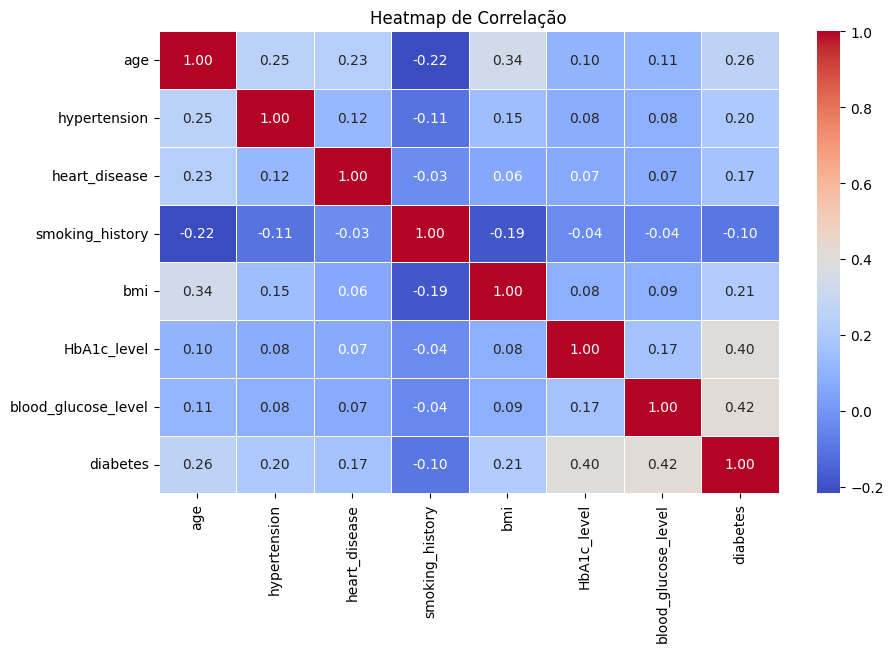

In [123]:
numeric_data = data.select_dtypes(include=['int64', 'float64']).drop(columns=["gender"])
correlation_matrix = numeric_data.corr()
# Plotar o heatmap das correlações
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlação")
plt.show()

In [124]:
correlation_pairs = correlation_matrix.unstack().abs()
correlation_pairs = correlation_pairs[correlation_pairs < 1].sort_values(ascending=False).drop_duplicates()

In [125]:
most_correlated = correlation_pairs.head(4).index  
print("Atributos mais correlacionados:")
correlation_pairs.head(4)

Atributos mais correlacionados:


diabetes     blood_glucose_level    0.419558
HbA1c_level  diabetes               0.400660
age          bmi                    0.337396
diabetes     age                    0.258008
dtype: float64

In [ ]:
for pair in most_correlated:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[pair[0]], y=data[pair[1]])
    plt.title(f"Scatterplot entre {pair[0]} e {pair[1]}")
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()

In [ ]:
X = data.drop(columns=['diabetes', 'smoking_history', 'gender'], axis=1)

y = data['diabetes']
X_train_model_basic, X_test_model_basic, y_train_model_basic, y_test_model_basic = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_model_basic, y_train_model_basic)
y_pred_dt_model_basic = clf.predict(X_test_model_basic)

In [ ]:
results.append(evaluate_model(y_test_model_basic, y_pred_dt_model_basic,"Árvore de Decisão Valores Default"))

In [ ]:
nb = GaussianNB()
nb.fit(X_train_model_basic, y_train_model_basic)
y_pred_nb_model_basic = nb.predict(X_test_model_basic)

In [ ]:
results.append(evaluate_model(y_test_model_basic, y_pred_nb_model_basic,"Naive Bayes Valores Default"))

In [ ]:
logreg = LogisticRegression(random_state=42, max_iter=1000) 
logreg.fit(X_train_model_basic, y_train_model_basic)
y_pred_logreg_model_basic = logreg.predict(X_test_model_basic)

In [ ]:
results.append(evaluate_model(y_test_model_basic, y_pred_logreg_model_basic,"Regressão Logística Valores Default"))

In [ ]:
svm = SVC()
svm.fit(X_train_model_basic, y_train_model_basic)
y_pred_svm = svm.predict(X_test_model_basic)

results.append(evaluate_model(y_test_model_basic, y_pred_logreg_model_basic, "SVM Valores Default"))

In [ ]:
mlp = MLPClassifier(max_iter=500)  
mlp.fit(X_train_model_basic, y_train_model_basic)
y_pred_mlp = mlp.predict(X_test_model_basic)
results.append(evaluate_model(y_test_model_basic, y_pred_logreg_model_basic, "MLP Valores Default"))

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
ensemble_hard = VotingClassifier(
    estimators=[('DT', dt), ('SVM', svm)],
    voting='hard'  
)
ensemble_hard.fit(X_train_model_basic, y_train_model_basic)
y_pred_ensemble = ensemble_hard.predict(X_test_model_basic)
results.append(evaluate_model(y_test_model_basic, y_pred_ensemble, "Ensemble MLP + Árvore de Decisão Modelo Default"))

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_model_basic, y_train_model_basic)
y_pred_rf = rf.predict(X_test_model_basic)
results.append(evaluate_model(y_test_model_basic, y_pred_rf, "RandomForest Valores Default"))

In [ ]:
selected_columns = ['HbA1c_level', 'blood_glucose_level']
X_newModel = data[selected_columns]
y_newModel = data['diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_newModel, y_newModel, test_size=0.3, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5, 
    min_samples_split=10,  
    min_samples_leaf=5,  
    random_state=42
)

In [ ]:

#max_depth=5: Limitar a profundidade evita que o modelo se torne propenso a overfitting
#min_samples_split=10: Garante que a arvore tenha peloo menos 10 amostra em um nó
#min_samples_leaf=5: Garante que a avora tenha pelo menos 5 amostra em cada folha

In [ ]:
dt.fit(X_train, y_train)
y_pred_new_model_dt = dt.predict(X_test)
results.append(evaluate_model(y_test, y_pred_new_model_dt, "Árvore de Decisão Modelo Melhorado 1"))

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_new_model_nb = nb.predict(X_test)
results.append(evaluate_model(y_test, y_pred_new_model_nb,"Naive Bayes Modelo Melhorado 1"))

In [ ]:
logreg = LogisticRegression(random_state=42, max_iter=1000) 
logreg.fit(X_train, y_train)
y_pred_new_model_logreg = logreg.predict(X_test)
results.append(evaluate_model(y_test, y_pred_new_model_logreg,"Regressão Logística Modelo Melhorado 1"))

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
results.append(evaluate_model(y_test, y_pred_svm, "SVM Modelo Melhorado 1"))

In [ ]:
mlp = MLPClassifier(max_iter=500)  # Aumentando as iterações para melhor convergência
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
results.append(evaluate_model(y_test, y_pred_mlp, "MLP Modelo Melhorado 1"))

In [ ]:
dt = DecisionTreeClassifier(criterion='gini',
    max_depth=5, 
    min_samples_split=10,  
    min_samples_leaf=5,  
    random_state=42)
svm = SVC(probability=True, random_state=42)
ensemble_hard = VotingClassifier(
    estimators=[('DT', dt), ('SVM', svm)],
    voting='hard'  
)
ensemble_hard.fit(X_train, y_train)
y_pred_ensemble = ensemble_hard.predict(X_test)
results.append(evaluate_model(y_test, y_pred_ensemble, "Ensemble MLP + Árvore de Decisão Modelo Melhora 1"))

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results.append(evaluate_model(y_test_model_basic, y_pred_rf, "RandomForest Modelo Melhora 1"))

In [ ]:
selected_columns = ['HbA1c_level', 'blood_glucose_level', 'smoking_history']
X_newModel2 = data[selected_columns]
y_newModel2 = data['diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_newModel2, y_newModel2, test_size=0.3, random_state=42)

In [ ]:
dt.fit(X_train, y_train)
y_pred_new_model_dt = dt.predict(X_test)
results.append(evaluate_model(y_test, y_pred_new_model_dt, "Árvore de Decisão Modelo Melhorado 2"))

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_new_model_nb = nb.predict(X_test)
results.append(evaluate_model(y_test, y_pred_new_model_nb,"Naive Bayes Modelo Melhorado 2"))

In [ ]:
logreg = LogisticRegression(random_state=42, max_iter=1000) 
logreg.fit(X_train, y_train)
y_pred_new_model_logreg = logreg.predict(X_test)
results.append(evaluate_model(y_test, y_pred_new_model_logreg,"Regressão Logística Modelo Melhorado 2"))

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
results.append(evaluate_model(y_test, y_pred_svm, "SVM Modelo Melhorado 2"))

In [ ]:
mlp = MLPClassifier(max_iter=500)  # Aumentando as iterações para melhor convergência
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
results.append(evaluate_model(y_test, y_pred_mlp, "MLP Modelo Melhorado 2"))

In [ ]:
dt = DecisionTreeClassifier(criterion='gini',
    max_depth=5, 
    min_samples_split=10,  
    min_samples_leaf=5,  
    random_state=42)
svm = SVC(probability=True, random_state=42)
ensemble_hard = VotingClassifier(
    estimators=[('DT', dt), ('SVM', svm)],
    voting='hard'  
)
ensemble_hard.fit(X_train, y_train)
y_pred_ensemble = ensemble_hard.predict(X_test)
results.append(evaluate_model(y_test, y_pred_ensemble, "Ensemble MLP + Árvore de Decisão Modelo Melhora 2"))

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results.append(evaluate_model(y_test_model_basic, y_pred_rf, "RandomForest Modelo Melhora 2"))

In [ ]:
selected_columns = ['HbA1c_level', 'blood_glucose_level', 'smoking_history', 'bmi', 'age']
X_newModel3 = data[selected_columns]
y_newModel3 = data['diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_newModel3, y_newModel3, test_size=0.3, random_state=42)

In [ ]:
dt.fit(X_train, y_train)
y_pred_new_model_dt = dt.predict(X_test)
results.append(evaluate_model(y_test, y_pred_new_model_dt, "Árvore de Decisão Modelo Melhorado 3"))

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_new_model_nb = nb.predict(X_test)
results.append(evaluate_model(y_test, y_pred_new_model_nb,"Naive Bayes Modelo Melhorado 3"))

In [ ]:
logreg = LogisticRegression(random_state=42, max_iter=1000) 
logreg.fit(X_train, y_train)
y_pred_new_model_logreg = logreg.predict(X_test)
results.append(evaluate_model(y_test, y_pred_new_model_logreg,"Regressão Logística Modelo Melhorado 3"))

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
results.append(evaluate_model(y_test, y_pred_svm, "SVM Modelo Melhorado 3"))

In [ ]:
mlp = MLPClassifier(max_iter=500)  # Aumentando as iterações para melhor convergência
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
results.append(evaluate_model(y_test, y_pred_mlp, "MLP Modelo Melhorado 3"))

In [ ]:
dt = DecisionTreeClassifier(criterion='gini',
    max_depth=5, 
    min_samples_split=10,  
    min_samples_leaf=5,  
    random_state=42)
svm = SVC(probability=True, random_state=42)
ensemble_hard = VotingClassifier(
    estimators=[('DT', dt), ('SVM', svm)],
    voting='hard'  
)
ensemble_hard.fit(X_train, y_train)
y_pred_ensemble = ensemble_hard.predict(X_test)
results.append(evaluate_model(y_test, y_pred_ensemble, "Ensemble MLP + Árvore de Decisão Modelo Melhora 3"))

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results.append(evaluate_model(y_test_model_basic, y_pred_rf, "RandomForest Modelo Melhora 3"))

In [ ]:
df_results = pd.DataFrame(results, columns=["Modelo", "Acurácia", "Precisão", "Recall", "F1-Score"])

In [ ]:
display(df_results)

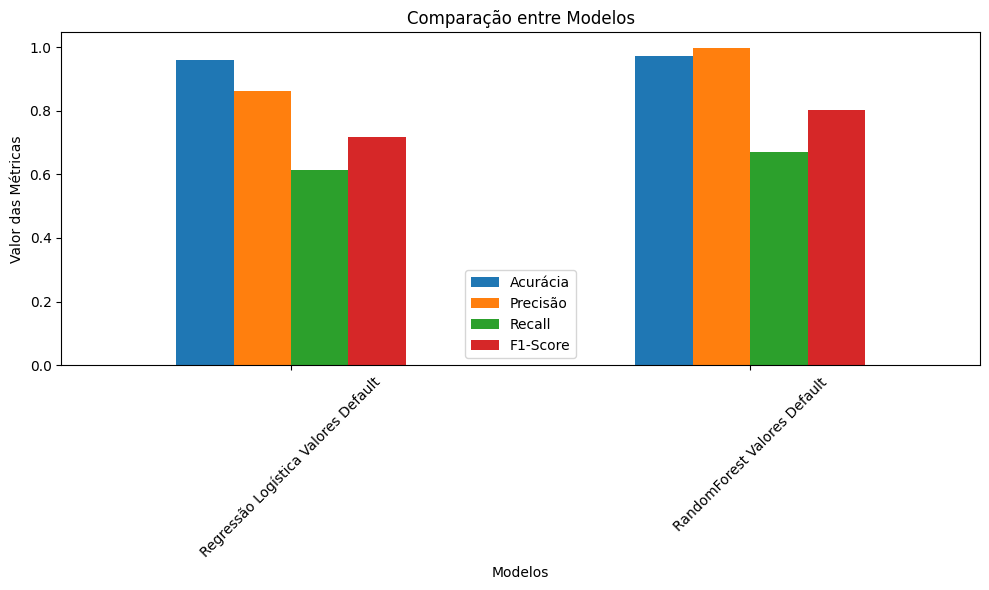

In [45]:
res = pd.DataFrame([results[2],results[6]], columns=["Modelo", "Acurácia", "Precisão", "Recall", "F1-Score"])
res.set_index("Modelo")[["Acurácia", "Precisão", "Recall", "F1-Score"]].plot(kind="bar", figsize=(10, 6))
plt.title("Comparação entre Modelos")
plt.ylabel("Valor das Métricas")
plt.xlabel("Modelos")
plt.xticks(rotation=45)
plt.tight_layout()
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt="%.2f", label_type="edge", fontsize=10, padding=3)
plt.show()

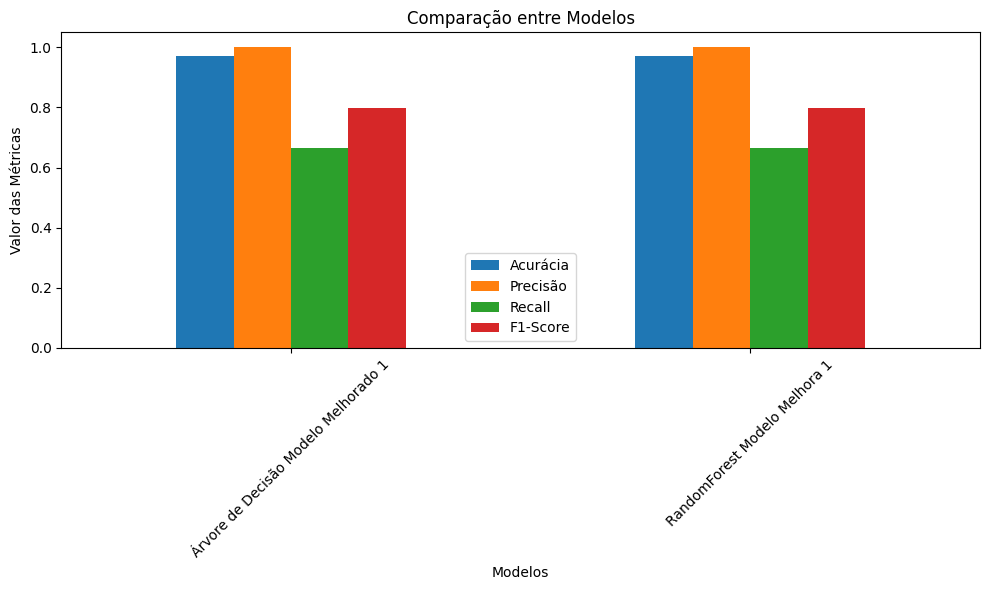

In [46]:
res = pd.DataFrame([results[7],results[13]], columns=["Modelo", "Acurácia", "Precisão", "Recall", "F1-Score"])
res.set_index("Modelo")[["Acurácia", "Precisão", "Recall", "F1-Score"]].plot(kind="bar", figsize=(10, 6))
plt.title("Comparação entre Modelos")
plt.ylabel("Valor das Métricas")
plt.xlabel("Modelos")
plt.xticks(rotation=45)
plt.tight_layout()
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt="%.2f", label_type="edge", fontsize=10, padding=3)
plt.show()

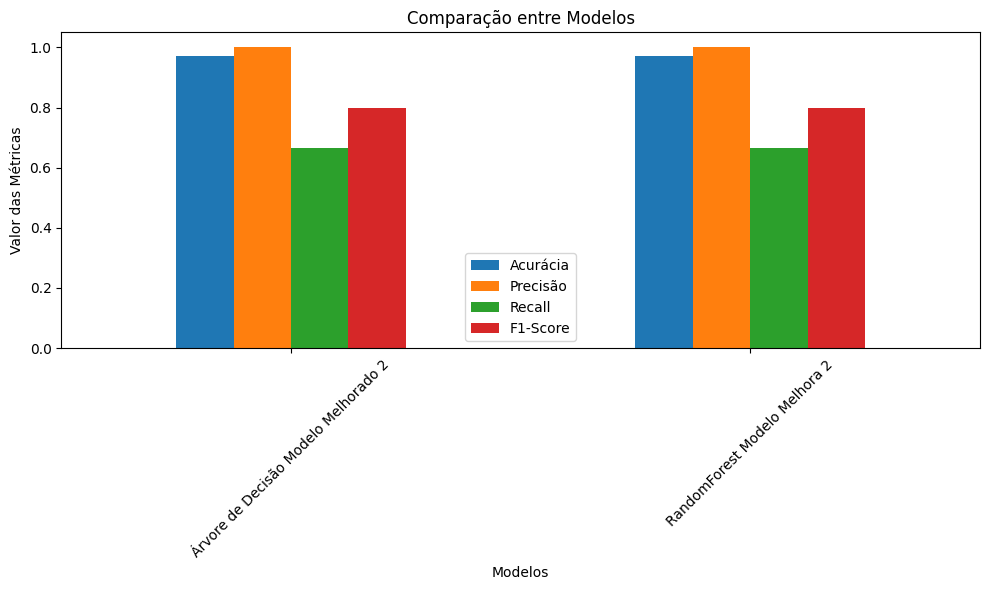

In [47]:
res = pd.DataFrame([results[14],results[20]], columns=["Modelo", "Acurácia", "Precisão", "Recall", "F1-Score"])
res.set_index("Modelo")[["Acurácia", "Precisão", "Recall", "F1-Score"]].plot(kind="bar", figsize=(10, 6))
plt.title("Comparação entre Modelos")
plt.ylabel("Valor das Métricas")
plt.xlabel("Modelos")
plt.xticks(rotation=45)
plt.tight_layout()
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt="%.2f", label_type="edge", fontsize=10, padding=3)
plt.show()